In [1]:
# Importing necessary libraries
import urllib
import requests
import time
# Necessary imports
import random
from flask import Flask, request
import random

In [2]:
# Necessary imports:
import json
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

/Users/kat/anaconda/envs/cs231n/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Importing data from a csv file
#import math
dataset = pd.read_csv(CURRENT_DIRECTORY + "/titanic/titanic_data.csv")
#dataset[math.isnan(float(dataset.Age))]

In [4]:
# Adding an Id tag to the dataframe
dataset["Id"] = range(len(dataset))

# splitting up the labels and the values for each species:
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']
X = dataset[feature_columns].values
Y = dataset['Survived'].values
Z = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']].values
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
Z[:,1] = le.fit_transform(Z[:,1])
X

array([[3, 1, 22.0, 1, 0, 7.25],
       [1, 0, 38.0, 1, 0, 71.2833],
       [3, 0, 26.0, 0, 0, 7.925],
       ..., 
       [1, 0, 19.0, 0, 0, 30.0],
       [1, 1, 26.0, 0, 0, 30.0],
       [3, 1, 32.0, 0, 0, 7.75]], dtype=object)

# VISUALIZATION

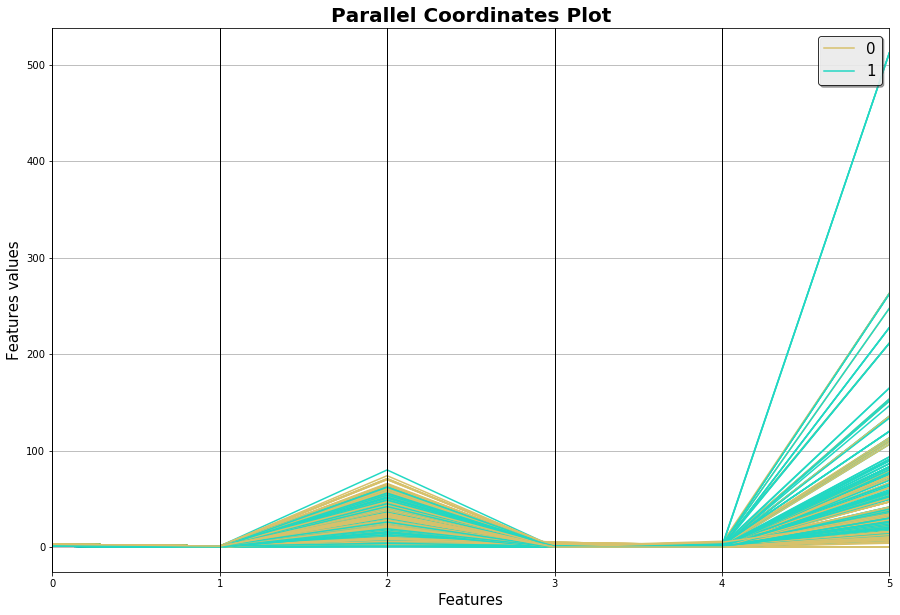

In [5]:
# Data Visualization:
plot_data = pd.DataFrame(Z)
plt.figure(figsize=(15,10))
parallel_coordinates(plot_data, 6)
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [6]:
# Splitting into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=28)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')

In [7]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)
print(Y_test)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')

[0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0]
Accuracy of model: 68.37 %.


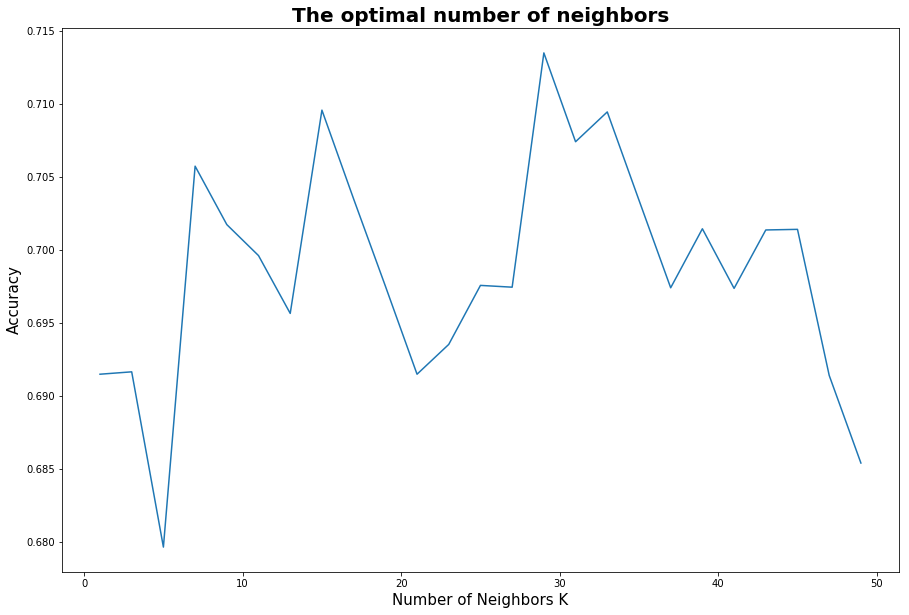

In [8]:
# creating list of cv scores
cv_scores = []
k_list = [i for i in range(1, 50, 2)]

# perform 10-fold cross validation
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

In [ ]:
feature_columns

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# Set up Flask App
app = Flask(__name__)


@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to flower names
    classes = [ 0 , 1]
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in feature_columns]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?sHeight=NUM&sWidth=NUM&pHeight=NUM&sHeight=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run(port = 8080)



# try 127.0.0.1:5000?sHeight=5.2&sWidth=4.6&pHeight=4.2&pWidth=7.8
    

 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
